#Topic Modeling: Preprocessing text

this project uses the tmtoolkit package for data mining. LINK: [tmtoolkit](https://tmtoolkit.readthedocs.io/en/latest/). 

###Imports

Other imports we are using include:
* nltk = natural language processing tool
* random = random number generator
* numpy = to do basic summary stats
* json = working with json
* Corpus from tmtoolkit = 
* matplotlib = for descriptive analytics

####get_time

In [ ]:
def get_time():
    from datetime import datetime, timedelta
    d = datetime.today() - timedelta(hours=7, minutes=0)
    return d.strftime('%H:%M:%S %p')

####imports

In [ ]:
start_time = get_time()
print("start time: %s" % start_time)

start time: 17:31:00 PM


In [ ]:
##good way to install things if u arent sure you have them
try:
    import tmtoolkit
except:
    !pip install tmtoolkit
    import tmtoolkit

import nltk
import random
import numpy as np
from tmtoolkit.corpus import Corpus
import json


random.seed(20210128) # make sampling reproducible
np.set_printoptions(precision=5)


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

*nltk.download packages used:*

* _stopwords_ = stopwords are words that dont have any meaning to the document. They appear in most topics and dont add value to our understanding of them. REMOVE THEM
    + e.g. the, it, etc..
* _punkt_ = list of punctuation characters

* _averaged_perceptron_tagger_ = tagger for parts of speech in a sentance

* wordnet = ???

#### Setup working directory and file path

In [ ]:
working_directory = '/content/drive/MyDrive/APRD6343'
json_path = "%s/allcarharttreviews.json" % working_directory
#https://tmtoolkit.readthedocs.io/en/latest/text_corpora.html

###Load JSON & check reviews

make sure the formatting is correct and the was data loaded in properly. 


In [ ]:
from time import sleep
#import file to read
json_file = json.load(open(json_path, 'r'))

#iterate through the json_file and get pull 1 review at a time (arev)
for arev in json_file:
    the_review = json_file[arev]
    # print(the_good_review)
    # sleep(3)

###Create a Corpus
create a corpus, iterate through the json_file and adds each review as a doc to the corpus

* a corpus is basically a different data structure - we must initialize a corpus using Corpus()
    + requires each document has an identifier and the text. enumerate to create an identifier.
    + __KEY-VALUE PAIR FORMAT__




In [ ]:
corpus= Corpus()
#enumerate creates index for corpus
for i, a_review in enumerate(json_file):
    if json_file[a_review]['overall'] <= 2.0:
    #pull the review and add to corpus values
        the_review = json_file[a_review]
        corpus.add_doc(str(i), the_review['reviewText'])

In [ ]:
#print length of corpus to make sure everything read in correctly
print("There are %s reviews with less than 3 stars." % len(corpus))
#print all labels of corpus
print(corpus.doc_labels)
#pull out specific entry
print(corpus['10003'])

There are 2103 reviews with less than 3 stars.
['10003', '1003', '10044', '10053', '10077', '1008', '10094', '10110', '10112', '10115', '10119', '10120', '10121', '10124', '10127', '10138', '10153', '10170', '10182', '10186', '10224', '10241', '10242', '10253', '10261', '10270', '10272', '10316', '10328', '10329', '10334', '10341', '10352', '1036', '10405', '10459', '10460', '10509', '10523', '10541', '10545', '10558', '1056', '10567', '10570', '10572', '10580', '1060', '10615', '10619', '10694', '10697', '10701', '10710', '10718', '10726', '10753', '1076', '10765', '10769', '10772', '10783', '10790', '10792', '10801', '10802', '10808', '10810', '10826', '10844', '1088', '10896', '10898', '1090', '10910', '10915', '1092', '10952', '10981', '10997', '11001', '1103', '11040', '11056', '11060', '11068', '11079', '11086', '11092', '11112', '11137', '11148', '11157', '11167', '11173', '11186', '11230', '11235', '11307', '11309', '11315', '11350', '11381', '11389', '11397', '11431', '11434',

(array([ 10.,   6.,  54., 357., 307., 184., 160., 163., 108.,  92.,  98.,
         68.,  55.,  56.,  46.,  33.,  37.,  32.,  24.,  33.,  18.,  14.,
         14.,   9.,  19.,  12.,  11.,   8.,   4.,   7.,   4.,   3.,   5.,
          6.,   2.,   0.,   8.,   3.,   0.,   2.,   4.,   3.,   1.,   0.,
          1.,   3.,   1.,   1.,   1.,   0.]),
 array([   0.,   33.,   66.,   99.,  132.,  165.,  198.,  231.,  264.,
         297.,  330.,  363.,  396.,  429.,  462.,  495.,  528.,  561.,
         594.,  627.,  660.,  693.,  726.,  759.,  792.,  825.,  858.,
         891.,  924.,  957.,  990., 1023., 1056., 1089., 1122., 1155.,
        1188., 1221., 1254., 1287., 1320., 1353., 1386., 1419., 1452.,
        1485., 1518., 1551., 1584., 1617., 1650.]),
 <BarContainer object of 50 artists>)

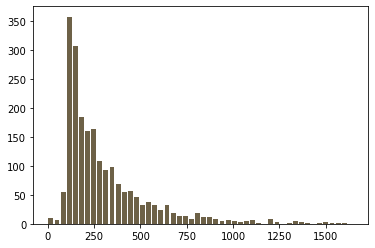

In [ ]:
import matplotlib

#look at how long the reviews are -- by character length
matplotlib.pyplot.hist(corpus.doc_lengths.values(), 
                       color='#6d6147', #dark yellow
                       bins=50, 
                       range=[0, 1650], 
                       align= 'mid', 
                       rwidth= .8)

# Now, the Preprocessing

In topic modeling it is only helpful to have words in your document that only significantly represent meaning. 
This means that you want words that describe/talk about the product in a unique way.
We also cannot feed full sentances to unsupervised machine learning (or supervised). So, we have to perform 'lematization' to get the words by themselfes. 
Goal with preprocessing = get reviews into lists with only words that have specific meaning











##step 1
* *TMPreproc* -> Initialize Topic Modeling Pre Process: preprocesses documents and saves as seperate data object.
* *pos_tag* -> Part of speech tagging; tags word for the part of speech that the word is being used for.
* *lemmatize* -> Break words down to their root word -- in nlp we call the root word the 'lemma'. so words like vacine and vacination are treated as the same word!!
* *tokens_to_lowercase* -> lowercase all tokens
* *remove_special_chars_in_tokens* -> removes special characters
* *preproc.add_stopwords* -> whenver the preprocess sees this, the word is skipped over. add any words that I think will be useless

In [ ]:
#https://tmtoolkit.readthedocs.io/en/latest/preprocessing.html
from tmtoolkit.preprocess import TMPreproc

preproc = TMPreproc(corpus, language='en')
preproc.pos_tag()
preproc.lemmatize()
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()
preproc.add_stopwords(['http', 'carhartt', 'amazon', 'wear', 'like', 'warm', "''", "get", "great", "know", "good", "would", "well", "buy"])

/usr/local/lib/python3.6/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


<TMPreproc [2103 documents / en]>

In [ ]:
#look at original corpus with full review
corpus['10003']

'I\'m frustrated this was delivered "from Amazon" without any type of packing slip. I love the coat, but the size is way too big. Now I\'m stuck with an $80 coat I can\'l wear. This has never happened to me before. I\'ve been shopping on Amazon for years.'

In [ ]:
#compare to the new tokens 
preproc.tokens['10003'][:20]

['i',
 'be',
 'frustrate',
 'this',
 'be',
 'deliver',
 '',
 'from',
 'amazon',
 '',
 'without',
 'any',
 'type',
 'of',
 'packing',
 'slip',
 '',
 'i',
 'love',
 'the']

In [ ]:
#number of unique tokens in all documents
print(preproc.vocabulary_size)
#number of documents
print(preproc.n_docs)
#top 10 most common words
print(preproc.vocabulary_counts.most_common()[:10])

5507
2103
[('', 18320), ('be', 6690), ('the', 6425), ('i', 5359), ('and', 3179), ('a', 3115), ('to', 2678), ('not', 2460), ('it', 2287), ('have', 2002)]


Below is code to show all of the features that we fit into the topic model:

* token = word
* pos = part of speech
* position = where in review it begins
* lemma = root of word
* whitespace = if there is a space on either side of the word? maybe

In [ ]:
preproc.tokens_datatable

,doc,position,token,lemma,pos,whitespace
0,10003,0,i,-PRON-,PRON,False
1,10003,1,be,be,AUX,True
2,10003,2,frustrate,frustrate,VERB,True
3,10003,3,this,this,DET,True
4,10003,4,be,be,AUX,True
...,...,...,...,...,...,...
17,9993,17,than,than,SCONJ,True
18,9993,18,a,a,DET,True
19,9993,19,coal,coal,NOUN,True
20,9993,20,color,color,NOUN,False


## Now, a more aggresive preprocessing

**another** copy of preproc will apply more aggressive cleaning and result in a smaller vocabulary size:
* **filter_for_pos** = filter for specific part of speech
* **clean_tokens** = can remove numbers
* **remove_common_tokens** = removes common words (words that are in a lot of reviews) increasing threshold decreases amount of words removed

* **remove_uncommon_tokens** = removes words that arent in very many (lower threshold = less words removed)

**NOTE: THIS IS TOO MUCH PREPROCESSING AND REMOVES SOME GOOD WORDS. Keep changing things in this section below to fine tune my model. should be able to look at some and make sure all important words are being included** 

*some tips= 
* *adjust the threshold for common tokens*
* *mannually removing stopwords*
* *adjusting the parts of speech included*



In [ ]:
#make copy of preprocess
preproc_smaller = preproc.copy()

preproc_smaller.filter_for_pos('N') #filter for pos= pos to keep
preproc_smaller.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc_smaller.remove_common_tokens(df_threshold=0.7)
preproc_smaller.remove_uncommon_tokens(df_threshold=.01)

print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

5507
159


Now inspect the new corpus and compare it to the old one!

*new corpus = more processed = more refined*

In [ ]:
print('less processed corpus results:')
print("vocab size: %s" % preproc.vocabulary_size)
print("n_docs: %s" % preproc.n_docs)
print("most common vocab counts: %s" % preproc.vocabulary_counts.most_common()[:10])
print()
print('more processed corpus results:')
print("vocab size: %s" % preproc_smaller.vocabulary_size)
print("n_docs: %s" % preproc_smaller.n_docs)
print("most common vocab counts: %s" % preproc_smaller.vocabulary_counts.most_common()[:20])

less processed corpus results:
vocab size: 5507
n_docs: 2103
most common vocab counts: [('', 18320), ('be', 6690), ('the', 6425), ('i', 5359), ('and', 3179), ('a', 3115), ('to', 2678), ('not', 2460), ('it', 2287), ('have', 2002)]

more processed corpus results:
vocab size: 159
n_docs: 2103
most common vocab counts: [('size', 849), ('shirt', 801), ('pair', 504), ('pant', 465), ('jean', 462), ('jacket', 392), ('sock', 390), ('quality', 358), ('time', 302), ('product', 294), ('fit', 277), ('boot', 271), ('work', 251), ('waist', 247), ('pocket', 240), ('material', 239), ('year', 214), ('one', 195), ('leg', 190), ('way', 187)]


In [ ]:
preproc_smaller.tokens_datatable

,doc,position,token,lemma,pos,whitespace
0,10003,0,type,type,NOUN,True
1,10003,1,coat,coat,NOUN,False
2,10003,2,size,size,NOUN,True
3,10003,3,coat,coat,NOUN,True
4,10003,4,year,year,NOUN,False
...,...,...,...,...,...,...
4,9975,4,coat,coat,NOUN,True
0,9993,0,jacket,Jacket,PROPN,True
1,9993,1,color,color,NOUN,True
2,9993,2,color,color,NOUN,True


In [ ]:
print(preproc.tokens['10003'])
print(preproc_smaller.tokens['10003'])
print("")
print(preproc.tokens['9975'])
print(preproc_smaller.tokens['9975'])

['i', 'be', 'frustrate', 'this', 'be', 'deliver', '', 'from', 'amazon', '', 'without', 'any', 'type', 'of', 'packing', 'slip', '', 'i', 'love', 'the', 'coat', '', 'but', 'the', 'size', 'be', 'way', 'too', 'big', '', 'now', 'i', 'be', 'stuck', 'with', 'an', '', '80', 'coat', 'i', 'canl', 'wear', '', 'this', 'have', 'never', 'happen', 'to', 'me', 'before', '', 'i', 'have', 'be', 'shop', 'on', 'amazon', 'for', 'year', '']
['type', 'coat', 'size', 'coat', 'year']

['weird', 'sizing', '', 'read', 'it', 'from', 'other', 'reviewer', 'but', 'decide', 'to', 'try', 'it', 'out', 'anyway', '', '', 'i', 'be', '5', 'foot', '5', 'inch', 'and', 'the', 'self', 'come', 'up', 'past', 'my', 'wrist', 'almost', '3', 'inch', '', '', 'defiantly', 'not', 'a', 'coat', 'i', 'could', 'wear', 'while', 'work', '']
['sizing', 'foot', 'inch', 'inch', 'coat']


## Create document labels

In [ ]:
doc_labels = np.array(preproc.doc_labels)
doc_labels[:10]

array(['10003', '1003', '10044', '10053', '10077', '1008', '10094',
       '10110', '10112', '10115'], dtype='<U5')

In [ ]:
vocab_bg = np.array(preproc.vocabulary)
vocab_sm = np.array(preproc_smaller.vocabulary)

In [ ]:
#document term matrix -- final format we will need for the topic modeling
#saved as binary term weights. 
dtm_bg = preproc.dtm
dtm_sm = preproc_smaller.dtm

dtm_bg, dtm_sm

(<2103x5507 sparse matrix of type '<class 'numpy.int32'>'
 	with 89630 stored elements in Compressed Sparse Row format>,
 <2103x159 sparse matrix of type '<class 'numpy.int32'>'
 	with 11577 stored elements in Compressed Sparse Row format>)

## Save final document term matrix as pickle

In [ ]:
import pickle
import scipy.sparse

pickle.dump(doc_labels, open('%s/doc_labels2star.p' % working_directory, 'wb'))

scipy.sparse.save_npz('%s/small_dtm2star.npz' % working_directory, dtm_sm)
scipy.sparse.save_npz('%s/big_dtm2star.npz' % working_directory, dtm_bg)

pickle.dump(vocab_bg, open('%s/big_vocab2star.p' % working_directory, 'wb'))
pickle.dump(vocab_sm, open('%s/small_vocab2star.p' % working_directory, 'wb'))

pickle.dump(corpus, open('%s/corpus2star.p' % working_directory, 'wb') )

In [ ]:
end_time = get_time()
print("start time: %s" % start_time)
print("end time: %s" % end_time)

start time: 17:31:00 PM
end time: 17:31:33 PM
